# Total Factor of Productivity (TFP)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrds
db = wrds.Connection()

In [86]:
dt = pd.read_csv('../data/TFPData_updated_ImrohorogluTuzel.csv')

In [38]:
comp = db.raw_sql("""
                    select gvkey, tic, conm, datadate, fyear, sich, prcc_f, csho,
                    at, aqc, ppegt, ppent, emp, capx, capxv, sale, cogs, xad, xrd, xsga,
                    pstkl, txditc,
                    pstkrv, seq, pstk, mkvalt
                    from comp.funda
                    where 
                    (sale > 0 or at > 0)
                    and indfmt='INDL'
                    and datafmt='STD'
                    and popsrc='D'
                    and consol='C'
                    and curcd='USD'
                    and datadate >= '1963-01-01'
                    and fic='USA'
                    and final='Y'
                    """)

In [4]:
dt.shape

(136523, 3)

In [104]:
comp.shape

(354814, 29)

In [5]:
dt.head()

,gvkey,fyear,TFP
0,1000,1970,-0.142948
1,1000,1971,-0.447827
2,1000,1972,-0.270695
3,1000,1973,-0.242724
4,1000,1974,-0.296757


In [9]:
dt.TFP.describe()

count    136523.000000
mean         -0.323590
std           0.438831
min          -5.530810
25%          -0.507897
50%          -0.304374
75%          -0.111074
max           3.360018
Name: TFP, dtype: float64

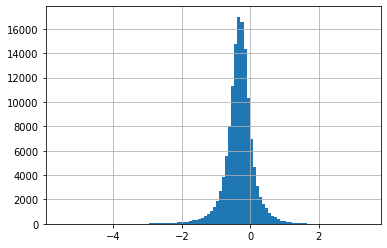

In [16]:
dt.TFP.hist(bins=100)

In [26]:
dt_TFP_frontier_yearly = dt.groupby('fyear')[['TFP']].max()
dt_TFP_mean_yearly = dt.groupby('fyear')[['TFP']].mean()
dt_TFP_median_yearly = dt.groupby('fyear')[['TFP']].median()

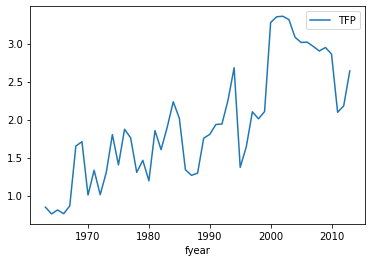

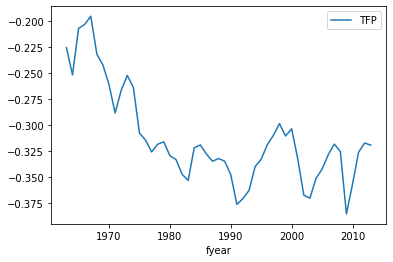

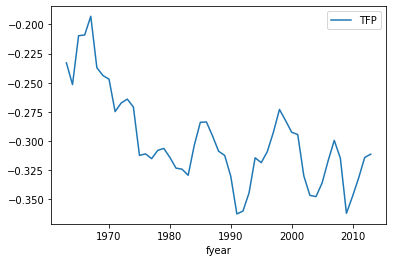

In [28]:
dt_TFP_frontier_yearly.plot()
dt_TFP_mean_yearly.plot()
dt_TFP_median_yearly.plot()

In [39]:
# create preferrerd stock
comp['ps']=np.where(comp['pstkrv'].isnull(), comp['pstkl'], comp['pstkrv'])
comp['ps']=np.where(comp['ps'].isnull(),comp['pstk'], comp['ps'])
comp['ps']=np.where(comp['ps'].isnull(),0,comp['ps'])

comp['txditc']=comp['txditc'].fillna(0)

# create book equity
comp['be']=comp['seq']+comp['txditc']-comp['ps']
comp['be']=np.where(comp['be']>0, comp['be'], np.nan)

In [40]:
# create market value
comp['me']=comp['prcc_f']*comp['csho']

In [102]:
# compare me and mkvalt
comp[comp.tic=='MSFT'][['fyear','mkvalt','me','sich']]

,fyear,mkvalt,me,sich
188925,1985.0,NaN,NaN,NaN
188926,1986.0,NaN,7.847394e+02,NaN
188927,1987.0,NaN,2.688411e+03,7372.0
188928,1988.0,NaN,3.595418e+03,7372.0
188929,1989.0,NaN,2.893054e+03,7372.0
188930,1990.0,NaN,8.641114e+03,7372.0
188931,1991.0,NaN,1.186969e+04,7372.0
188932,1992.0,NaN,1.904973e+04,7372.0
188933,1993.0,NaN,2.481600e+04,7372.0
188934,1994.0,NaN,2.999412e+04,7372.0


In [94]:
comp['gvkey']=comp.gvkey.astype('int')

# Merge

In [1034]:
df=pd.merge(dt,comp, on=['gvkey','fyear'])

In [1035]:
df.shape

(126096, 30)

In [1036]:
df=df[df['sich'].notna()]

In [1037]:
df.shape

(75229, 30)

In [1038]:
#df= df[~((df.sich >= 4900) & (df.sich < 5000))]
#df= df[~((df.sich >= 6000) & (df.sich < 7000))]

In [1039]:
df.shape

(75229, 30)

In [1040]:
#df=df[(df.aqc <= (0.05 * df['at']))]

In [1041]:
df.shape

(75229, 30)

In [1042]:
# clip TFP
lr = df['TFP'].describe(percentiles=[0.005])['0.5%']
up = df['TFP'].describe(percentiles=[0.995])['99.5%']
df.TFP = df.TFP.clip(lr, up)

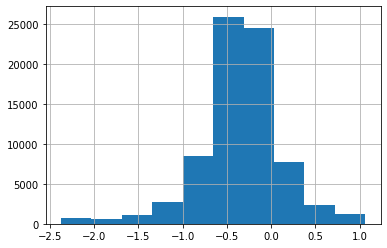

In [1043]:
df.TFP.hist()

In [1044]:
df.loc[df.index,'TFP_frontier_fyear_sich'] = df.groupby(['fyear', 'sich'])['TFP'].transform(max)
df.loc[df.index,'TFP_mean_fyear_sich'] = df.groupby(['fyear', 'sich'])['TFP'].transform(np.mean)
df.loc[df.index,'TFP_median_fyear_sich'] = df.groupby(['fyear', 'sich'])['TFP'].transform(np.median)

In [1045]:
df.loc[df.index,'gap'] = df['TFP_frontier_fyear_sich'] - df['TFP']

In [1046]:
df.groupby('fyear').gap.nunique()

fyear
1984       1
1985       1
1986       1
1987    2272
1988    2342
1989    2328
1990    2326
1991    2337
1992    2425
1993    2543
1994    2718
1995    2901
1996    2958
1997    3117
1998    3195
1999    3117
2000    2840
2001    2671
2002    2612
2003    2597
2004    2527
2005    2436
2006    2308
2007    2156
2008    2092
2009    2033
2010    2008
2011    1921
2012    1849
2013    1787
Name: gap, dtype: int64

In [1047]:
df=df[df.fyear>=1987]

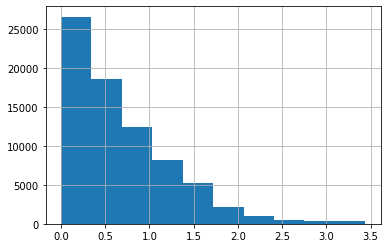

In [1048]:
df.gap.hist()

In [1049]:
df=df[df['be'].notna()]
df=df[df['me'].notna()]

df=df[df['be']>0]
df=df[df['me']>0]

In [1050]:
df.shape

(67000, 34)

In [1051]:
df['beme'] = df['be']/df['me']

In [1052]:
df['beme'].describe()

count     67000.000000
mean         18.685475
std        1697.681110
min           0.000141
25%           0.329861
50%           0.559164
75%           0.913425
max      267639.093318
Name: beme, dtype: float64

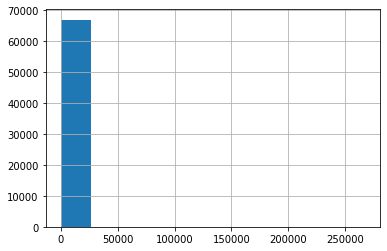

In [1053]:
df['beme'].hist()

In [1054]:
df[['gap', 'beme']].corr()

,gap,beme
gap,1.000000,-0.007303
beme,-0.007303,1.000000


In [1055]:
from scipy.stats.mstats import winsorize

In [1056]:
df['beme'].describe()

count     67000.000000
mean         18.685475
std        1697.681110
min           0.000141
25%           0.329861
50%           0.559164
75%           0.913425
max      267639.093318
Name: beme, dtype: float64

In [1057]:
lr = df['beme'].describe(percentiles=[0.005])['0.5%']
up = df['beme'].describe(percentiles=[0.995])['99.5%']
df.beme = df.beme.clip(lr, up)

In [1058]:
df.shape

(67000, 35)

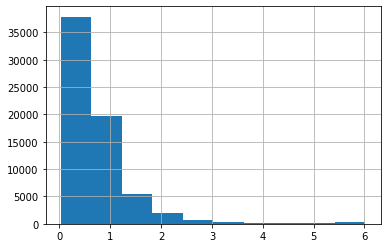

In [1059]:
df.beme.hist()

In [1060]:
# clip gap
# lr = df['gap'].describe(percentiles=[0.005])['0.5%']
# up = df['gap'].describe(percentiles=[0.995])['99.5%']
# df.gap = df.gap.clip(lr, up)

In [1061]:
df[['gap', 'beme']].corr()

,gap,beme
gap,1.000000,0.084366
beme,0.084366,1.000000


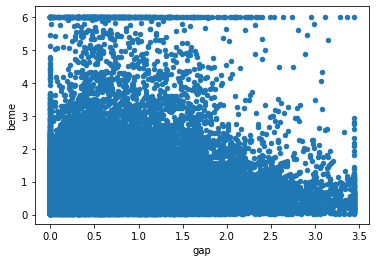

In [1062]:
df.plot.scatter(x='gap', y='beme')

# Panel Regressions

In [1063]:
from linearmodels import PanelOLS

In [1064]:
df=df.set_index(['gvkey','fyear'])

In [1065]:
df['size'] = np.log(df['at'])

In [1066]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + np.log(gap+0.0001) + size + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='kernel')
print(res)

/Users/shinggg/anaconda3/lib/python3.6/site-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0271
Estimator:                   PanelOLS   R-squared (Between):             -0.0964
No. Observations:               67000   R-squared (Within):               0.0283
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.0454
Time:                        15:07:25   Log-likelihood                -4.904e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      545.41
Entities:                        8286   P-value                           0.0000
Avg Obs:                       8.0859   Distribution:                 F(3,58685)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             80.682
                            

In [1067]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + ppent+ emp+ capx+ sale+ cogs+ xrd+ xsga+ EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='kernel')
print(res)

/Users/shinggg/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0300
Estimator:                   PanelOLS   R-squared (Between):             -0.1200
No. Observations:               39466   R-squared (Within):               0.0255
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.0697
Time:                        15:07:26   Log-likelihood                -2.472e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      118.14
Entities:                        5039   P-value                           0.0000
Avg Obs:                       7.8321   Distribution:                 F(9,34392)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             74.092
                            

In [1068]:
mod = PanelOLS.from_formula('beme ~ 1 + TFP + size + ppent + np.sqrt(emp) + np.log(capx)+ np.log(sale)+ EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='kernel')
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0598
Estimator:                   PanelOLS   R-squared (Between):             -0.0412
No. Observations:               67000   R-squared (Within):               0.0550
Date:                Wed, Dec 09 2020   R-squared (Overall):              0.0155
Time:                        15:07:26   Log-likelihood                -4.789e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      622.13
Entities:                        8286   P-value                           0.0000
Avg Obs:                       8.0859   Distribution:                 F(6,58682)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             78.120
                            

# Sort Portfolios

In [1069]:
df.head()

TFP   tic                   conm    datadate    sich  \
gvkey fyear                                                              
1003  1987  -0.431385  ANTQ  A.A. IMPORTING CO INC  1988-01-31  5712.0   
1004  1987  -0.094028   AIR               AAR CORP  1988-05-31  5080.0   
      1988   0.093879   AIR               AAR CORP  1989-05-31  5080.0   
      1989  -0.176446   AIR               AAR CORP  1990-05-31  5080.0   
      1990  -0.032535   AIR               AAR CORP  1991-05-31  5080.0   

                prcc_f    csho       at    aqc    ppegt  ...  mkvalt   ps  \
gvkey fyear                                              ...                
1003  1987    2.750000   2.683   16.042  0.000    2.297  ...     NaN  0.0   
1004  1987   25.124977  15.870  284.948  2.749   76.251  ...     NaN  0.0   
      1988   31.249992  16.009  356.391  2.397   85.414  ...     NaN  0.0   
      1989   21.249998  16.082  388.521  0.000  105.646  ...     NaN  0.0   
      1990   14.124999  15.891  379.958  0.000  113.060  ...     NaN  0.0   

                  be          me  TFP_frontier_fyear_sich  \
gvkey fyear                                                 
1003  1987     7.643    7.378250                 0.281747   
1004  1987   158.497  398.733387                -0.020875   
      1988   202.580  500.281128                 0.093879   
      1989   225.548  341.742462                 0.225044   
      1990   231.778  224.460360                 0.428965   

             TFP_mean_fyear_sich  TFP_median_fyear_sich       gap      beme  \
gvkey fyear                                                                   
1003  1987             -0.326386              -0.228362  0.713133  1.035882   
1004  1987             -0.314268              -0.369059  0.073152  0.397501   
      1988             -0.647322              -0.564653  0.000000  0.404932   
      1989             -0.363125              -0.387185  0.401490  0.659994   
      1990             -0.451156              -0.164397  0.461501  1.032601   

                 size  
gvkey fyear            
1003  1987   2.775210  
1004  1987   5.652307  
      1988   5.876028  
      1989   5.962347  
      1990   5.940061  

[5 rows x 34 columns]

In [1070]:
df.gap.describe()

count    67000.000000
mean         0.670598
std          0.594392
min          0.000000
25%          0.218009
50%          0.532843
75%          0.993217
max          3.440073
Name: gap, dtype: float64

## Overall sort

In [1071]:
dec_dict=df.gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()
#dec_dict=df.gap.quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).to_dict()

In [1072]:
dec_dict

{0.0: 0.0,
 0.1: 0.0,
 0.2: 0.15052082000000003,
 0.3: 0.27938987,
 0.4: 0.4023993,
 0.5: 0.53284265,
 0.6: 0.6885857000000002,
 0.7: 0.8766934060000002,
 0.8: 1.12425224,
 0.9: 1.4777494300000003,
 1.0: 3.4400725400000005}

In [1073]:
df.loc[(df.gap >=dec_dict[0.0]) & (df.gap <= dec_dict[0.1]),['gap','TFP','beme']].mean()

gap     0.000000
TFP     0.067226
beme    0.556835
dtype: float64

In [1074]:
list(dec_dict.keys())[1::]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [1075]:
var_list=['gap','TFP','beme']
overall_sort_dict={}
overall_sort_gap=[]
overall_sort_TFP=[]
overall_sort_beme=[]

for i in range(0,10):
    decile = list(dec_dict.keys())[1::][i]
    if i == 0:
        print('decile = 0.1')
        overall_sort_gap.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['gap'])
        overall_sort_TFP.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['TFP'])
        overall_sort_beme.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['beme'])
    else:
        print(decile)
        decile0 = list(dec_dict.keys())[1::][i-1]
        overall_sort_gap.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['gap'])
        overall_sort_TFP.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['TFP'])
        overall_sort_beme.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['beme'])
        
overall_sort_dict['gap']=overall_sort_gap
overall_sort_dict['TFP']=overall_sort_TFP
overall_sort_dict['beme']=overall_sort_beme

decile = 0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [1076]:
overall_sort_dict

{'gap': [0.0,
  0.08237434948156065,
  0.21681652009253854,
  0.34050011289253834,
  0.46661361824776154,
  0.6086273300149257,
  0.7790682804865691,
  0.9949706126835797,
  1.288768774952242,
  1.941601104035814],
 'TFP': [0.06722551806857563,
  -0.10491684119009374,
  -0.18113325168656744,
  -0.2339380599701488,
  -0.2851077481492539,
  -0.3159484932925375,
  -0.3640260104477618,
  -0.41933592455223856,
  -0.5328061304507478,
  -1.0762119208507401],
 'beme': [0.5568346644645168,
  0.5947000940930518,
  0.676683117722942,
  0.782247456126896,
  0.8152148378088216,
  0.8262994648120415,
  0.8326543572411088,
  0.8084057290301496,
  0.7959182306451212,
  0.8212147259736211]}

In [1077]:
overall_sort_df=pd.DataFrame(overall_sort_dict)

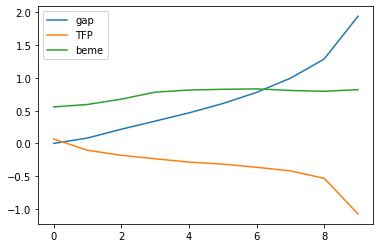

In [1078]:
overall_sort_df.plot()

In [1079]:
overall_sort_df.loc[9]-overall_sort_df.loc[0]

gap     1.941601
TFP    -1.143437
beme    0.264380
dtype: float64

## Sort within year then average across year

In [1080]:
df.reset_index(inplace=True)

In [1081]:
df.groupby('fyear').gap.max()

fyear
1987    3.440073
1988    3.058306
1989    3.344874
1990    3.330000
1991    3.317053
1992    3.404767
1993    3.440073
1994    3.440073
1995    3.368245
1996    3.440073
1997    3.440073
1998    3.440073
1999    3.440073
2000    3.440073
2001    3.440073
2002    3.440073
2003    3.440073
2004    3.440073
2005    3.440073
2006    3.440073
2007    3.440073
2008    3.440073
2009    3.440073
2010    3.440073
2011    3.440073
2012    3.440073
2013    3.440073
Name: gap, dtype: float64

In [1082]:
dec_year_dict=df[df.fyear==1987].gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()

In [1083]:
dec_year_dict

{0.0: 0.0,
 0.1: 0.0,
 0.2: 0.10290959999999999,
 0.3: 0.20570029999999997,
 0.4: 0.2992575,
 0.5: 0.40166995000000005,
 0.6: 0.49959139999999996,
 0.7: 0.6384341,
 0.8: 0.8131877,
 0.9: 1.08815225,
 1.0: 3.4400725400000005}

In [1084]:
df[df.fyear==1987].loc[(df[df.fyear==1987].gap >dec_year_dict[0.1]) & (df[df.fyear==1987].gap <= dec_year_dict[0.2]), ['gap','TFP','beme']].mean()

gap     0.053124
TFP    -0.092117
beme    0.653706
dtype: float64

In [1085]:
list(dec_year_dict.keys())[1::]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [1086]:
len(set(df.fyear))

27

In [1087]:
var_list=['gap','TFP','beme']
for year in set(df.fyear):
    overall_sort_dict={}
    overall_sort_gap=[]
    overall_sort_TFP=[]
    overall_sort_beme=[]
    dec_year_dict=df[df.fyear==year].gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()
    print(year)

    for i in range(0,10):
        decile = list(dec_year_dict.keys())[1::][i]
        if i == 0:
            #print('decile = 0.1')
            overall_sort_gap.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['gap'])
            overall_sort_TFP.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['TFP'])
            overall_sort_beme.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['beme'])
        else:
            #print(decile)
            decile0 = list(dec_year_dict.keys())[1::][i-1]
            overall_sort_gap.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['gap'])
            overall_sort_TFP.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['TFP'])
            overall_sort_beme.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['beme'])

    overall_sort_dict['gap']=overall_sort_gap
    overall_sort_dict['TFP']=overall_sort_TFP
    overall_sort_dict['beme']=overall_sort_beme

    if year==1987:
        overall_sort_df=pd.DataFrame(overall_sort_dict)
    else:
        overall_sort_df+=pd.DataFrame(overall_sort_dict)

overall_sort_df=overall_sort_df/len(set(df.fyear))

1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013


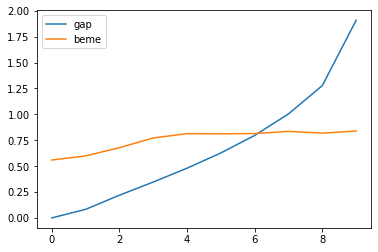

In [1088]:
overall_sort_df[['gap','beme']].plot()

In [1089]:
overall_sort_df

,gap,TFP,beme
0,0.000001,0.067483,0.558977
1,0.082872,-0.105907,0.598478
2,0.219310,-0.178829,0.678159
3,0.346662,-0.232933,0.772034
4,0.480063,-0.272254,0.813648
5,0.627547,-0.315622,0.812140
6,0.796703,-0.368627,0.814653
7,1.004563,-0.430595,0.835627
8,1.278047,-0.541631,0.818416
9,1.908603,-1.087891,0.838792


In [1090]:
overall_sort_df.corr()

,gap,TFP,beme
gap,1.000000,-0.970739,0.749904
TFP,-0.970739,1.000000,-0.709415
beme,0.749904,-0.709415,1.000000


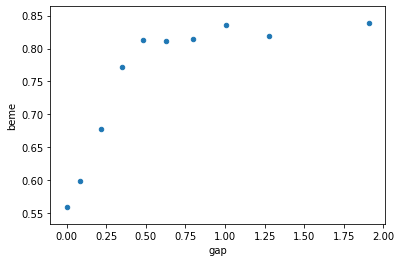

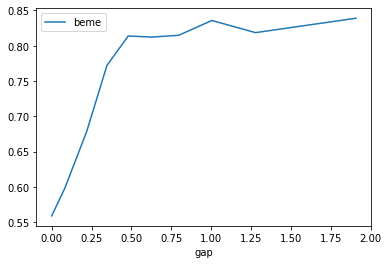

In [1091]:
overall_sort_df.plot.scatter(y='beme',x='gap')
overall_sort_df.plot.line(y='beme',x='gap')